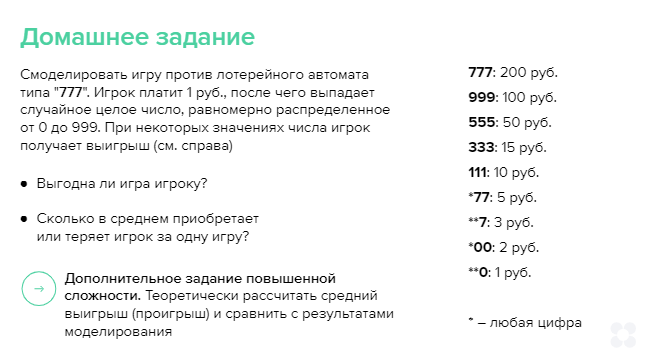

In [1]:
import numpy as np

In [6]:
trials = 1000000    # Количество попыток
successes = 0      # Количество успешных попыток
cash = 0           # Количество выиграных денег

for i in range(trials):
    random_score = np.random.randint(0 , 1000)    # Случайное количество очков от 0 до 999

    if random_score == 777:
        successes += 1
        cash += 200
    elif random_score == 999:
        successes += 1
        cash += 100
    elif random_score == 555:
        successes += 1
        cash += 50
    elif random_score == 333:
        successes += 1
        cash += 15
    elif random_score == 111:
        successes += 1
        cash += 10
    elif random_score % 100  == 77:
        successes += 1
        cash += 5
    elif random_score % 10  == 7:
        successes += 1
        cash += 3
    elif random_score % 100  == .00:
        successes += 1
        cash += 2
    elif random_score % 10  == 0:
        successes += 1
        cash += 1
    
        
g_avg = cash / trials    # средний выигрыш за одну игру

print(f'Попытки: {trials},\nУспехи:  {successes},\nВыигрыш: {cash}')
print(f'Средняя потеря за одну игру: {round(100*(1-g_avg))} копеек')

Попытки: 1000000,
Успехи:  203563,
Выигрыш: 800552
Средняя потеря за одну игру: 20 копеек


Из результата мы видим, что игра не выгодна игроку. При моделировании 1 млн. попыток запуска автомата - упешных 203 563, общая сумма выигрыша при этом составляет 800 552. Что подтверждает первоначальное утверждение.
В среднем игрок теряет за одну игру: 20 копеек, что составляет 20%.

А чтобы рассчитать средний проигрыш теоретически надо определить вероятность каждого выигрышного исхода и воспользоваться формулой P1*X1 + P2*X2 + ... + Pn*Xn, вот так:

In [7]:
# выигрышные комбинации, вероятность каждой комбинации и выигрыш при каждой комбинации:
combinations = ['777', '999', '555', '333', '111', '77', '7', '00', '0']
probabilities = [1/1000, 1/1000, 1/1000, 1/1000, 1/1000, (10-1)/1000, (100-1-9)/1000, 1/100, (10-1)/100]
gains = [200, 100, 50, 15, 10, 5, 3, 2, 1]
# подсчитываем теоретический выигрыш по формуле: P1*X1 + P2*X2 + ... + Pn*Xn
avg_gain = 0
for gain, probability in zip(gains, probabilities):
    avg_gain += gain * probability
avg_gain

0.8

In [8]:
# hight = 53000     # Вержняя граница выигранных партий
# low = 47000       # Нижняя граница выигранных партий
# spec = 0.04567    # Вероятность

# p = spec * hight + (1 - spec) *  low  # Теоретическая вероятность 
# print(p)

не верное решение тут

<!-- Основываясь на формуле по получению среднего значения получим средний выигрыш в размере 47274, что отличается от нашей модели. Хочется отметить, что при моделировании при нескольких попытках пройти отбор выводилась сумма выигрыша в диапазонах 47000-53000, чаще встречалась сумма 47500-48000. При таком раскладе станет более приближенна смоделированная к теоретической вероятности. Сумма 52298 находится у верхней границы возможного выигрыша, что не гарантирует ее, но является возможной. 

Возможно, что при повышении числа попыток диапазон будет уменьшен и приблизится ближе к теоретической вероятности суммы выигрыша. -->
